# Telecom Customer Churn

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# data
df  = pd.read_csv('E:\omar-analyst\machine learning python\projects\churn\data\customer_churn.csv')

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\scan\AppData\Local\Temp\ipykernel_1468\1533228959.py:2: SyntaxWarning: invalid escape sequence '\o'
  df  = pd.read_csv('E:\omar-analyst\machine learning python\projects\churn\data\customer_churn.csv')


In [3]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

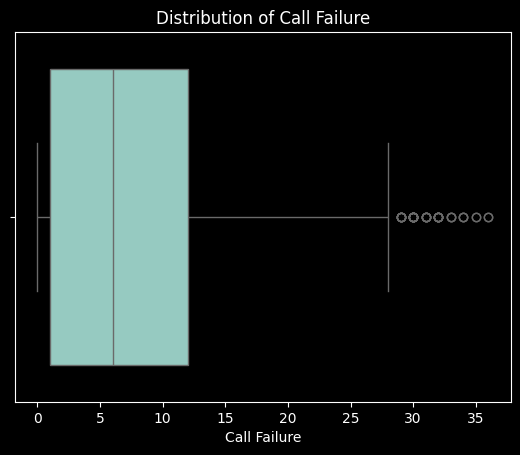

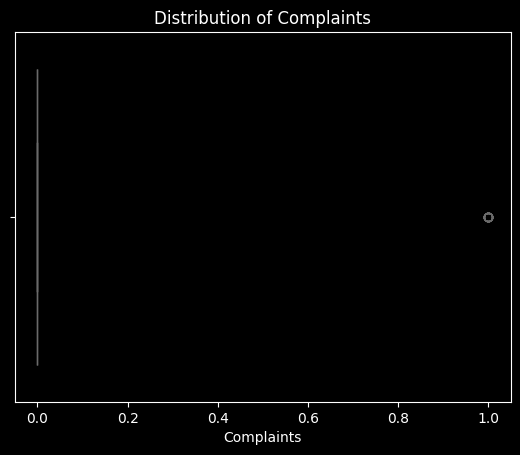

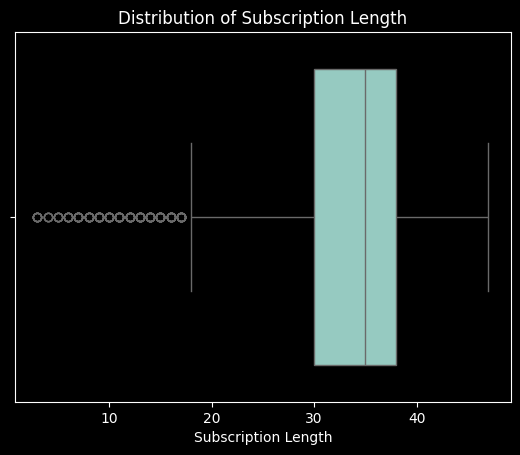

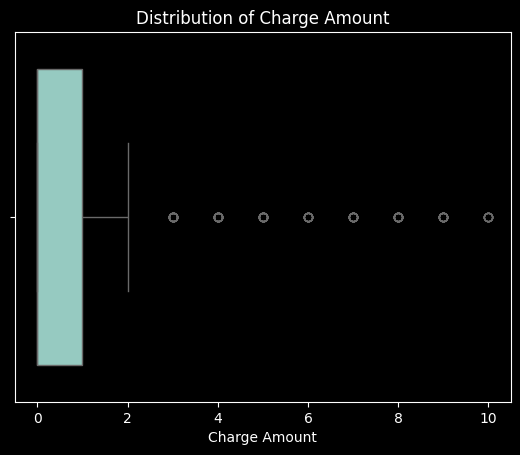

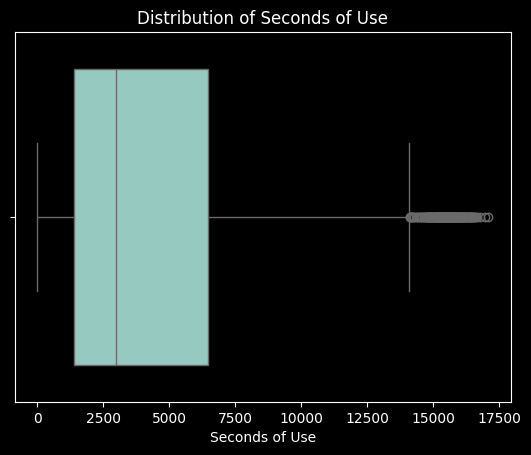

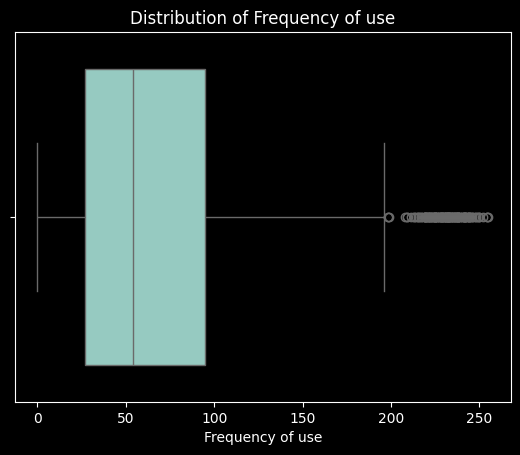

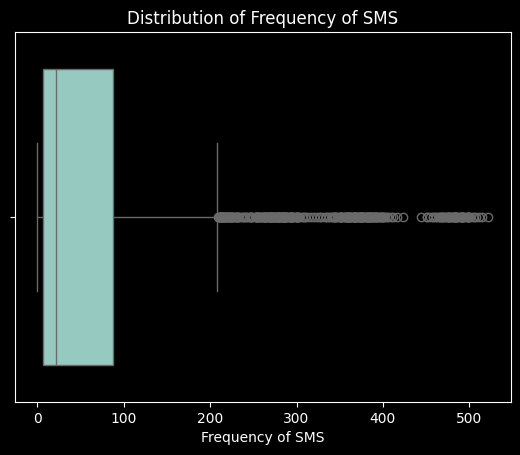

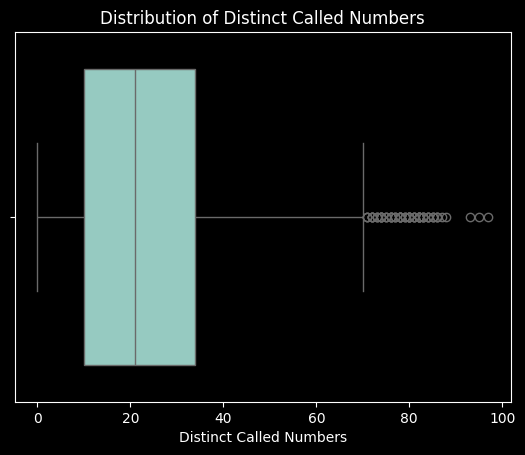

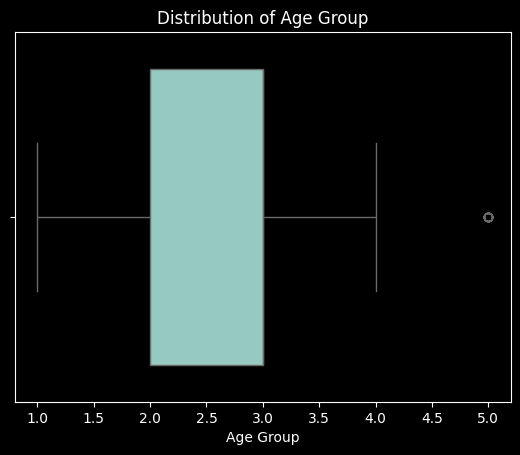

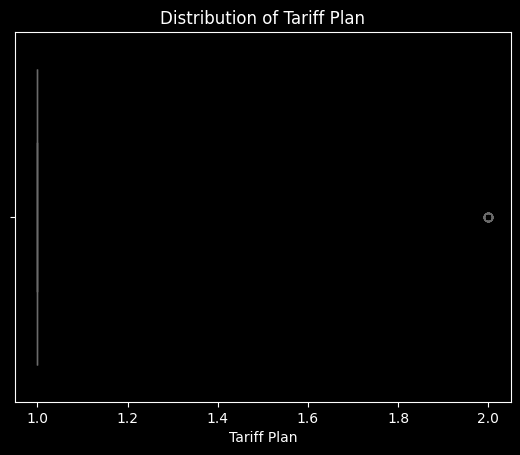

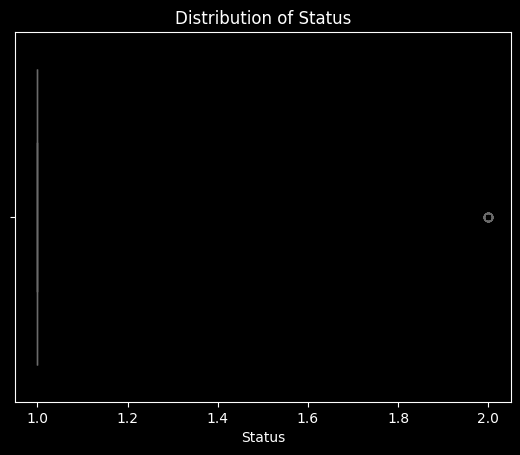

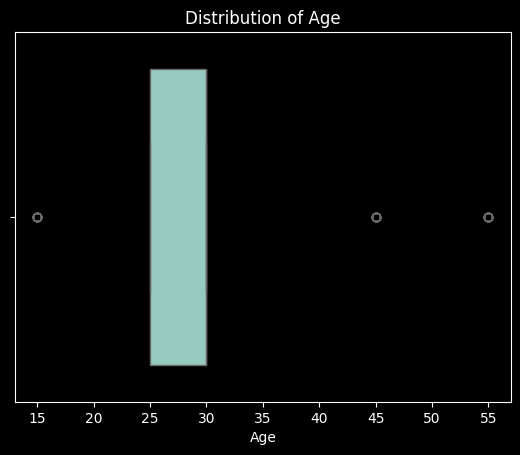

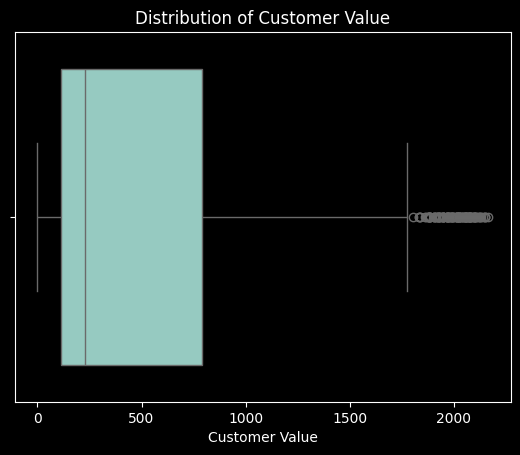

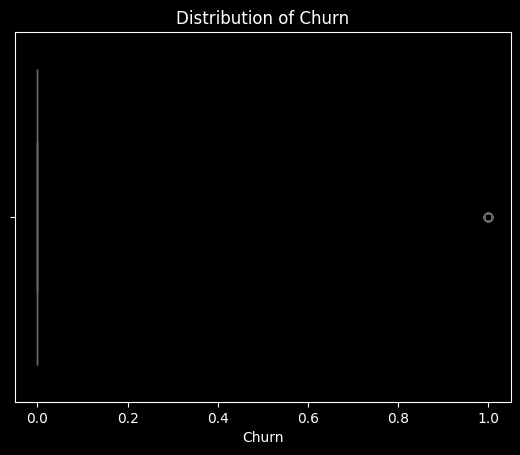

In [ ]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title("Distribution of " + col)
    #plt.savefig("distribution_" + col + ".png")
    plt.show()

In [6]:
df.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


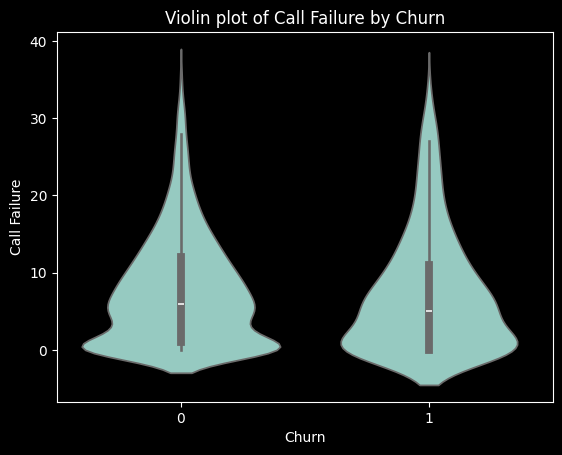

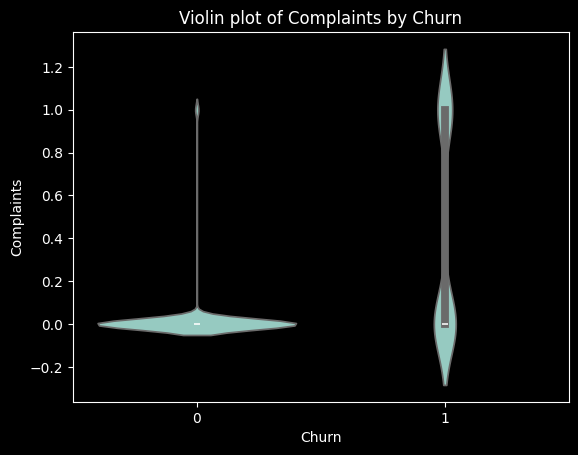

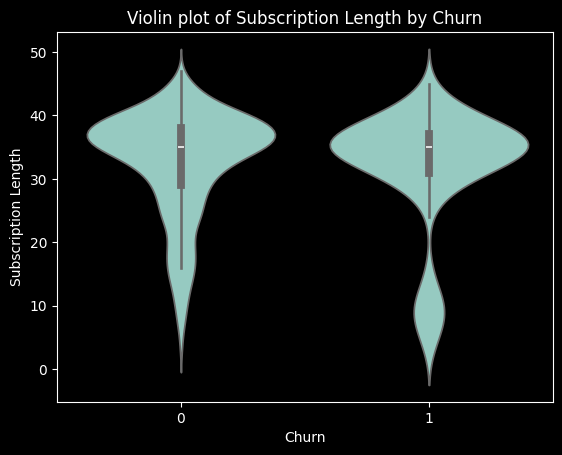

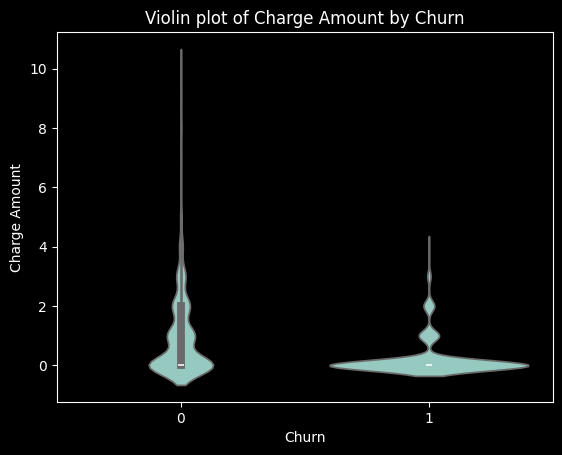

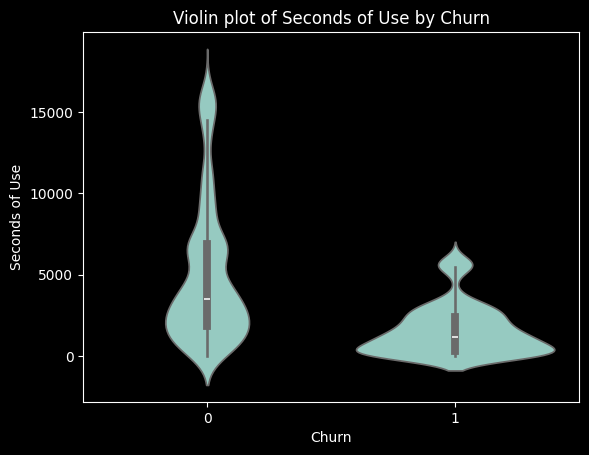

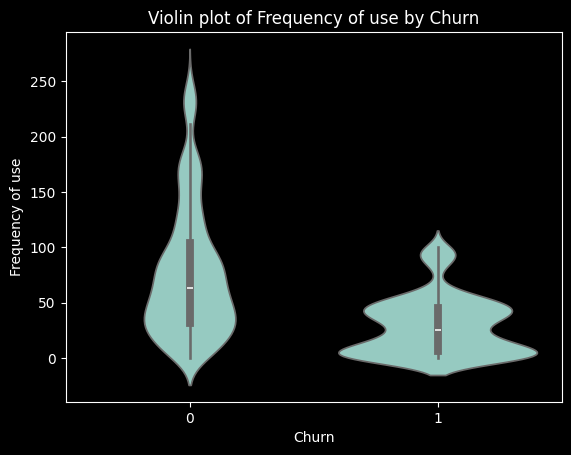

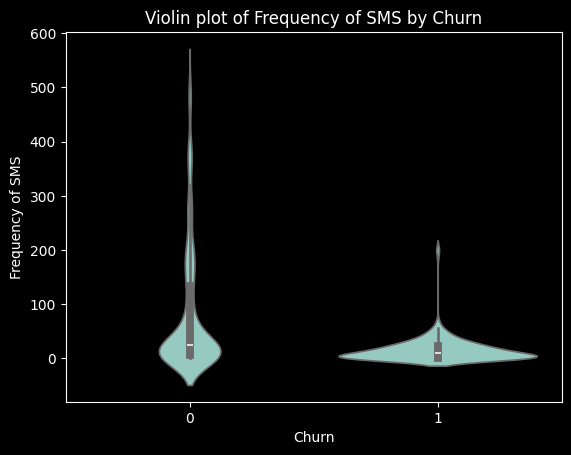

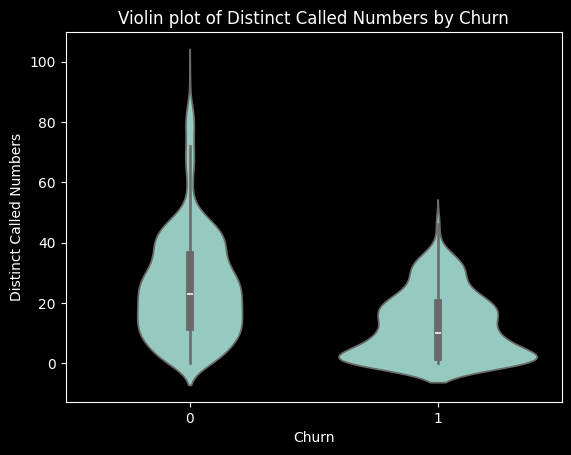

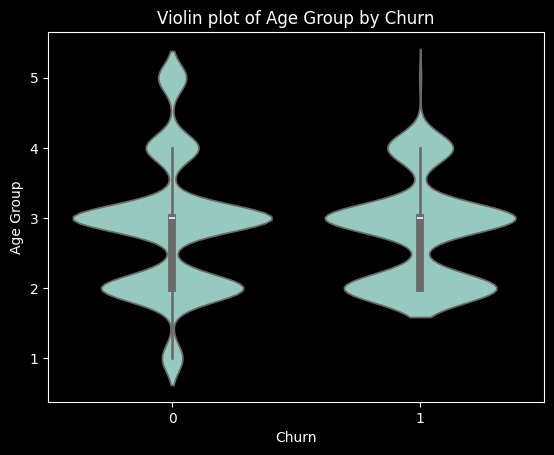

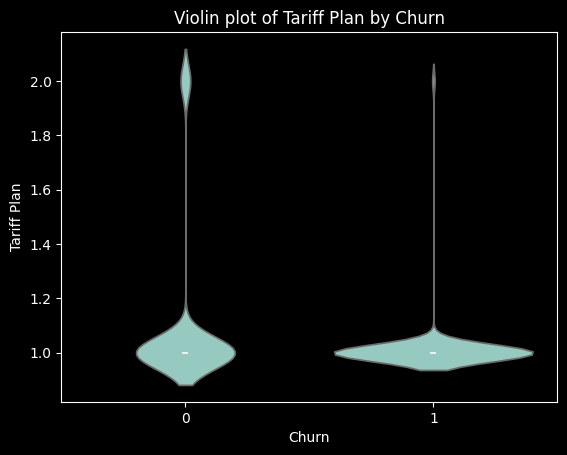

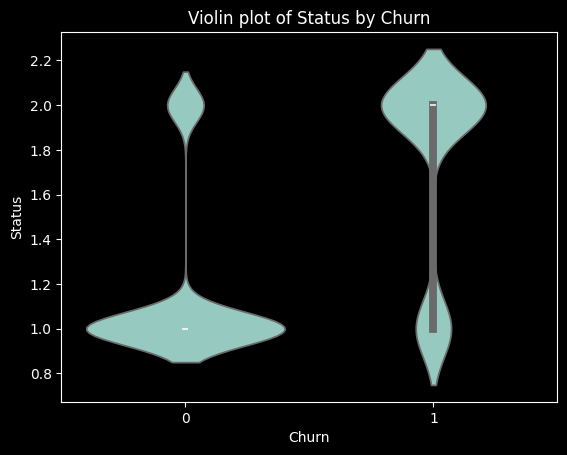

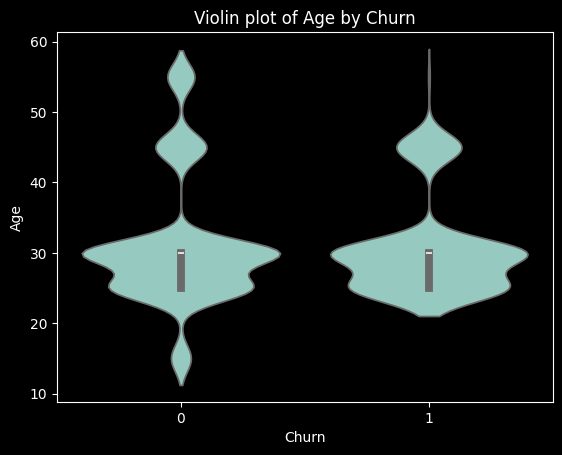

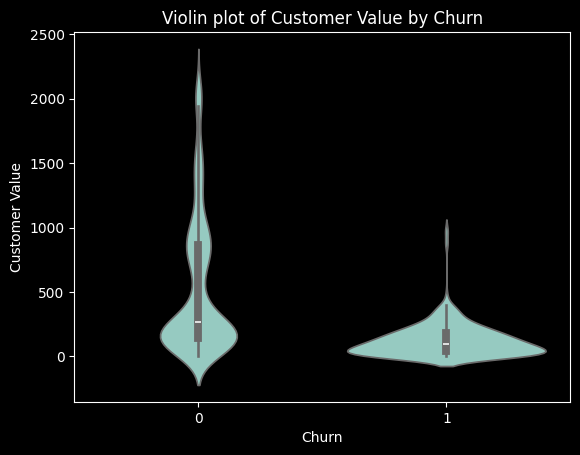

In [ ]:
for col in df.columns:
    if col != 'Churn':
        sns.violinplot(x='Churn', y=col, data=df)
        plt.title("Violin plot of " + col + " by Churn")
        #plt.savefig(f'violin_{col}_by_churn.png')
        plt.show()
        


# 🧠 Project Note

* I will start by building a Logistic Regression model first, as it has the ability to interpret the coefficients, not just make predictions.

In [10]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       520
           1       0.46      0.17      0.25       110

    accuracy                           0.82       630
   macro avg       0.65      0.57      0.57       630
weighted avg       0.78      0.82      0.79       630



c:\Users\scan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
coefficients = pd.DataFrame({'Feature': df.columns[:-1], 'Coefficient': log.coef_[0]})
coefficients['odds_ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients.sort_values(by='odds_ratio', ascending=False))
coefficients

                    Feature  Coefficient  odds_ratio
0              Call Failure     0.194141    1.214268
1                Complaints     0.101316    1.106626
10                   Status     0.072011    1.074667
8                 Age Group     0.008428    1.008464
12           Customer Value     0.007756    1.007787
7   Distinct Called Numbers     0.001619    1.001620
9               Tariff Plan     0.001009    1.001010
4            Seconds of Use    -0.000243    0.999757
11                      Age    -0.002658    0.997346
2       Subscription Length    -0.011198    0.988865
6          Frequency of SMS    -0.051872    0.949450
5          Frequency of use    -0.052356    0.948991
3             Charge Amount    -0.090510    0.913466


,Feature,Coefficient,odds_ratio
0,Call Failure,0.194141,1.214268
1,Complaints,0.101316,1.106626
2,Subscription Length,-0.011198,0.988865
3,Charge Amount,-0.090510,0.913466
4,Seconds of Use,-0.000243,0.999757
5,Frequency of use,-0.052356,0.948991
6,Frequency of SMS,-0.051872,0.949450
7,Distinct Called Numbers,0.001619,1.001620
8,Age Group,0.008428,1.008464
9,Tariff Plan,0.001009,1.001010


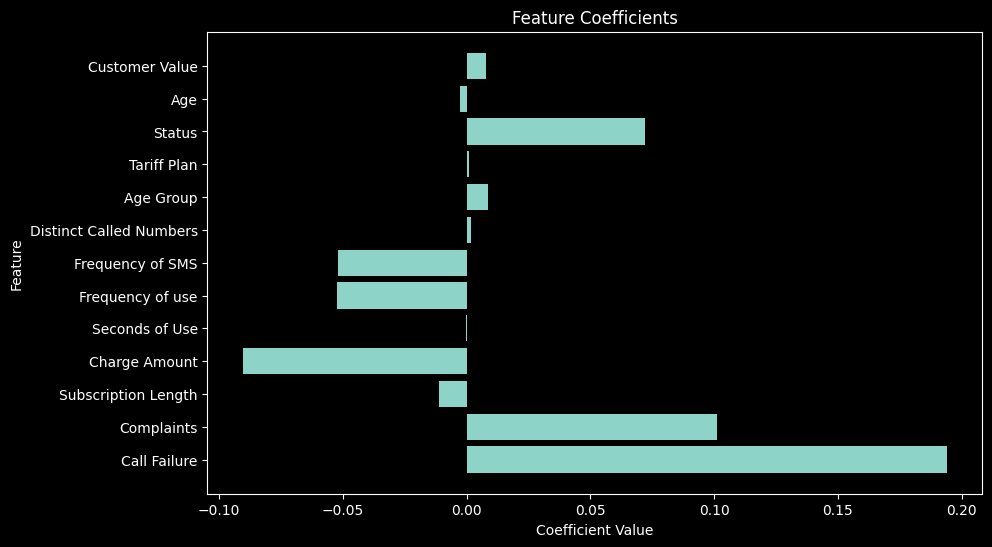

In [12]:
plt.figure(figsize=(10,6))
plt.title('Feature Coefficients')
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

## 📊 تحليل أهمية الميزات (Feature Coefficients)

يوضح هذا الرسم البياني "الوصفة" التي يستخدمها نموذج الانحدار اللوجيستي للتنبؤ بالـ Churn.

إنه يوضح لنا ما هي الميزات التي **تدفع العميل للرحيل** (المعاملات الموجبة  Positive)، وما هي الميزات التي **تشجعه على البقاء** (المعاملات السالبة Negative).

**طول الشريط = قوة التأثير.**

---

### 😡 1. أهم العوامل التي تسبب المغادرة (Churn) - (المعاملات الموجبة)

هذه هي "الأعلام الحمراء". كلما زادت قيمة هذه الميزات، زادت احتمالية مغادرة العميل.

1.  **`Call Failure` (فشل المكالمات): (معامل ≈ +0.19)**
    * **التفسير:** هذا هو أقوى سبب للرحيل. كلما **زاد** عدد مرات فشل المكالمات، زادت احتمالية المغادرة. هذا منطقي تماماً.
2.  **`Complaints` (الشكاوى): (معامل ≈ +0.09)**
    * **التفسير:** هذه ميزة ثنائية (0 = لا شكوى، 1 = شكوى). المعامل الموجب يعني أن الانتقال من 0 إلى **1** (أي تقديم شكوى) يرفع احتمالية المغادرة بشكل كبير.
3.  **`Status` (الحالة): (معامل ≈ +0.07)**
    * **التفسير:** هذه ميزة ثنائية (1 = نشط، 2 = غير نشط). المعامل الموجب يعني أن الانتقال من 1 إلى **2** (أي التحول إلى "غير نشط") يرفع احتمالية المغادرة. هذا بديهي، فالعميل غير النشط هو بالفعل في طريقه للرحيل.

---

### 😊 2. أهم العوامل التي تشجع على البقاء (Retention) - (المعاملات السالبة)

هذه هي "عوامل الولاء". كلما زادت قيمة هذه الميزات، قلت احتمالية مغادرة العميل.

1.  **`Charge Amount` (قيمة الشحن): (معامل ≈ -0.10)**
    * **التفسير:** هذه ميزة ترتيبية (0 = الأدنى، 9 = الأعلى). المعامل **السالب** يعني أنه كلما **زادت** قيمة الشحن (أي كلما اتجهنا نحو 9)، **قلت** احتمالية المغادرة. العملاء الذين يدفعون أكثر هم الأكثر ولاءً.
2.  **`Frequency of use` (تكرار الاستخدام): (معامل ≈ -0.05)**
    * **التفسير:** كلما **زاد** عدد المكالمات، **قلت** احتمالية المغادرة.
3.  **`Frequency of SMS` (تكرار الرسائل): (معامل ≈ -0.05)**
    * **التفسير:** كلما **زاد** عدد الرسائل، **قلت** احتمالية المغادرة.

---

### ⚠️ 3. حل اللغز: لماذا بعض المعاملات = صفر؟

> **اللغز:** لماذا ميزات مثل `Customer Value` و `Seconds of Use` أظهرت معامل (Coefficient) يساوي صفر، بينما الرسوم البيانية (Violin Plots) أظهرت أنها مهمة جداً؟

**الحل المؤكد الآن: الارتباط المتعدد (Multicollinearity)**

* من الواضح الآن أن `Customer Value` (قيمة العميل) هي قيمة **محسوبة** بناءً على ميزات أخرى مثل `Seconds of Use` (ثواني الاستخدام) و `Charge Amount` (قيمة الشحن).
* هذه الميزات الثلاث (`Customer Value`, `Seconds of Use`, `Charge Amount`) تحكي "نفس القصة" للنموذج (وهي "مدى استخدام العميل للخدمة").
* نموذج الانحدار اللوجيستي "ذكي" بما يكفي ليرى هذا التكرار. ولكي لا يرتبك، فإنه:
    1.  **اختار ميزة واحدة** لتكون "الممثل" عن هذه الفكرة (وهي `Charge Amount`).
    2.  أعطى هذه الميزة "الوزن" (المعامل السالب القوي -0.10).
    3.  **قام بتصفير** الميزات الأخرى المكررة (`Customer Value` و `Seconds of Use`) لأنه "اكتفى" بالميزة الأولى.

**الخلاصة:** هذا لا يعني أن `Customer Value` غير مهمة. بل يعني أن تأثيرها تم "التقاطه" بالكامل عن طريق ميزة `Charge Amount`.

In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       520
           1       0.82      0.77      0.79       110

    accuracy                           0.93       630
   macro avg       0.88      0.87      0.88       630
weighted avg       0.93      0.93      0.93       630



In [14]:
# check overfitting
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_dtc))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_dtc))

Training Accuracy: 0.9936507936507937
Testing Accuracy: 0.9301587301587302


# الفجوة (Gap): يوجد فرق 6.4% بين أداء التدريب وأداء الاختبار.


In [30]:
params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=kf, scoring='accuracy')
grid_dtc.fit(X_train, y_train)
print("Best parameters:", grid_dtc.best_params_)
best_dtc = grid_dtc.best_estimator_
y_pred_best_dtc = best_dtc.predict(X_test)
print(classification_report(y_test, y_pred_best_dtc))

Best parameters: {'max_depth': None, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.82      0.76      0.79       110

    accuracy                           0.93       630
   macro avg       0.89      0.86      0.88       630
weighted avg       0.93      0.93      0.93       630



In [31]:
y_train_pred = best_dtc.predict(X_train)
y_test_pred = best_dtc.predict(X_test)
print("Training Accuracy after tuning:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy after tuning:", accuracy_score(y_test, y_test_pred))

Training Accuracy after tuning: 0.9896825396825397
Testing Accuracy after tuning: 0.9301587301587302


## 📉 أسباب رفض نموذج شجرة القرار (DTC)

بناءً على النتائج، تم رفض نموذج `DecisionTreeClassifier` (حتى بعد محاولات تحسينه) للأسباب التالية:

1.  **التكيف المفرط الشديد (High Overfitting):**
    * النموذج الأصلي (بدون قيود) أظهر فجوة كبيرة (6.4%) بين دقة التدريب (99.4%) ودقة الاختبار (93.0%).
    * هذا يعني أن النموذج "حفظ" الضوضاء في بيانات التدريب بدلاً من "تعلم" الأنماط العامة.

2.  **فشل محاولات التقليم (Failed Pruning):**
    * محاولاتنا لـ "تقييد" الشجرة لحل الـ Overfitting (باستخدام `max_depth` و `min_samples_leaf` يدوياً أو عبر `GridSearchCV`) أدت إلى نتائج **أسوأ**.
    * **النتيجة:** انخفضت دقة الاختبار (Testing Accuracy) إلى (90.2%) و (91.6%).
    * **التشخيص:** لقد تسببنا في **Underfitting**. الشجرة المقلمة أصبحت "بسيطة" لدرجة أنها فشلت في التقاط الأنماط المعقدة والمهمة في البيانات. 

3.  **وجود بديل أفضل (Random Forest):**
    * بما أن "شجرة واحدة" إما معقدة جداً (Overfit) أو بسيطة جداً (Underfit)، فإنها ليست النموذج المناسب لهذه البيانات.
    * نموذج **الغابة العشوائية (Random Forest)** مصمم خصيصاً لحل هذه المشكلة، حيث يجمع قوة مئات الأشجار مع تجنب مشكلة الـ Overfitting، مما يؤدي إلى أداء أعلى وأكثر استقراراً.

# ترويض التباين وتعزيز الاستقرار :Bagging الهدف الأساسي ل
يشير التباين إلى مدى حساسية .)Variance Reduction( هو تقليل التباين Bagging الهدف الجوهري والأسمى لخوارزمية
النموذج للتقلبات الصغيرة في بيانات التدريب. النموذج ذو التباين المرتفع قد يتغير بشكل كبير عند تغيير مجموعة التدريب بشكل
طفيف، مما يجعله غير مستقر. من خلال تدريب نماذج متعددة على عينات بيانات مختلفة قلي لاً ثم حساب متوسط تنبؤاتها، تعمل
على "تنعيم" حدود القرار، مما يجعل النموذج النهائي أقل تأث رً ا بضوضاء أو خصوصيات أي مجموعة بيانات تدريب Bagging
واحدة.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_features=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       531
           1       0.93      0.98      0.96        99

    accuracy                           0.99       630
   macro avg       0.96      0.98      0.97       630
weighted avg       0.99      0.99      0.99       630



In [63]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Training Accuracy of Random Forest:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy of Random Forest:", accuracy_score(y_test, y_pred_test))

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.9857142857142858


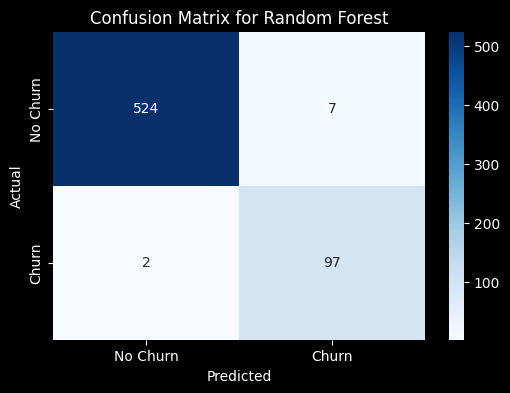

In [64]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()

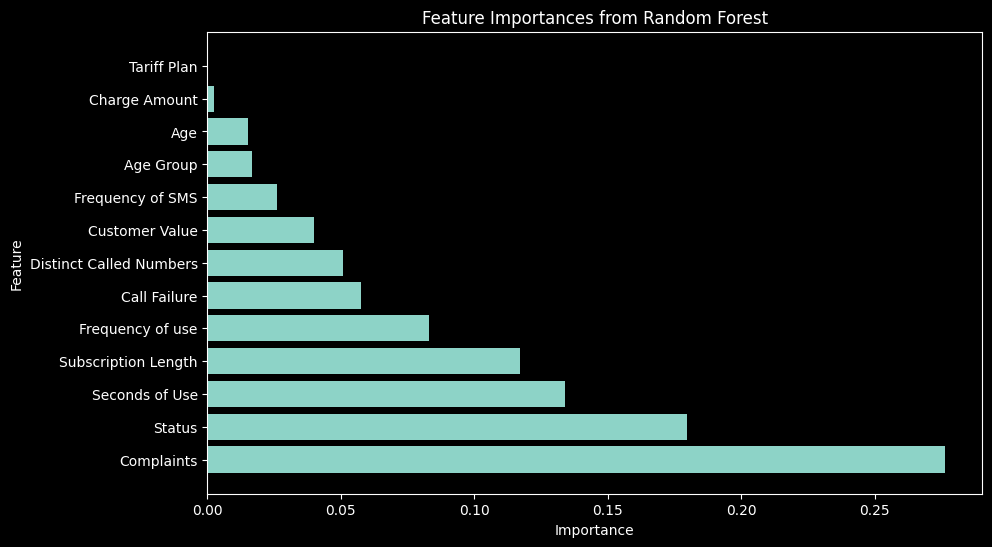

In [65]:
importances = rf.feature_importances_
feature_names = df.columns[:-1]
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Feature Importances from Random Forest')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 🎯 الخلاصة النهائية والتوصيات المقترحة

بناءً على نتائج نموذج الغابة العشوائية (Random Forest) الناجح (دقة 98.6%)، وتحليل أهمية الميزات (Feature Importance)، هذه هي القصة التي ترويها البيانات والتوصيات المقترحة لجهة العمل.

---

### القصة النهائية: لماذا يغادر العملاء؟

النموذج واضح جداً: العملاء يغادرون لسببين رئيسيين يمكن قياسهما:

**1. تجربة سيئة (Bad Experience):** 😡
* **`Complaints` (الشكاوى):** هذا هو السبب **رقم واحد** بلا منازع. العميل الذي يقدم شكوى هو العميل الأكثر عرضة للرحيل.
* **`Status` (الحالة):** عندما يتحول العميل إلى "غير نشط" (non-active)، فهذه علامة متأخرة على أنه قرر الرحيل بالفعل.
* **`Call Failure` (فشل المكالمات):** جودة الخدمة الرديئة وفشل المكالمات المتكرر هو عامل طرد رئيسي.

**2. انخفاض الاستخدام والولاء (Low Engagement):** 📉
* **`Seconds of Use` (ثواني الاستخدام):** العملاء الذين لا يتحدثون كثيراً هم الأقل ولاءً والأسهل مغادرة.
* **`Subscription Length` (مدة الاشتراك):** العملاء الجدد (مدة اشتراك قصيرة) يغادرون بسهولة أكبر من العملاء القدامى.
* **`Frequency of use` (تكرار الاستخدام):** العملاء الذين لا يتصلون كثيراً ليس لديهم ما يربطهم بالخدمة.

---

### 💡 التوصيات المقترحة لجهة العمل (Actionable Insights)

بناءً على هذه النتائج، يمكن توجيه الموارد كالتالي:

* **الأولوية القصوى: نظام معالجة الشكاوى `(Complaints)`**
    * **المشكلة:** `Complaints` هو المؤشر الأهم.
    * **الحل:** يجب إنشاء نظام "إنذار أحمر" فوري. أي شكوى يجب أن تُعالج بأولوية قصوى لضمان رضا العميل، لأن هذا هو العميل الأكثر عرضة للمغادرة.

* **الأولوية الثانية: تحسين جودة الخدمة `(Call Failure)`**
    * **المشكلة:** جودة الشبكة الرديئة تدفع العملاء للرحيل.
    * **الحل:** الاستثمار في تحسين البنية التحتية لتقليل معدل `Call Failure` هو استثمار ضروري لتقليل الـ Churn.

* **برامج الولاء الاستباقية (Proactive Retention)**
    * **المشكلة:** العملاء يقللون استخدامهم (`Seconds of Use` و `Frequency of use`) *قبل* أن يغادروا.
    * **الحل:** بدلاً من انتظار العميل ليصبح `Status = 2` (غير نشط)، يجب على نظام التسويق استهداف العملاء الذين يظهرون انخفاضاً ملحوظاً في "ثواني الاستخدام" أو "تكرار الاستخدام" وتقديم عروض تحفيزية لهم *قبل* فوات الأوان.

In [ ]:
#import joblib

# افترض أن اسم نموذجك هو rf_model
# قم بحفظ النموذج في ملف
#filename = 'rf_churn_model.pkl'
#joblib.dump(rf, filename)

#print(f"تم حفظ النموذج بنجاح في ملف: {filename}")

تم حفظ النموذج بنجاح في ملف: rf_churn_model.pkl
